**QUESTION 2: NORMAL LIKELIHOOD WITH NORMAL-INVERSE-GAMMA PRIOR** 

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data")

# Calculate the sample mean and variance of the data
print('Data sample mean:', np.mean(data))
print('Data sample variance:', np.var(data))

200 data
Data sample mean: 3.065080189542003
Data sample variance: 3.6152141787699223


In [3]:
# Data for Stan model
data1 = {
    'x' : data,
    'count' : len(data),
    'mu' : 0,        
    'nu' : 0.054,    
    'alpha' : 1.12,  
    'beta' : 0.4,
}

In [4]:
# Stan model
stan_code = """

data {
    int<lower=0> count;
    real x[count];    
    real<lower=0> mu;
    real<lower=0> nu;
    real<lower=0> alpha;  
    real<lower=0> beta;   
   
}

parameters {
    real mu_mean;
    real<lower=0> sigma2;
}

transformed parameters {
    real<lower=0> sigma;
    sigma = sqrt(sigma2);
}

model {
    mu_mean ~ normal(mu,sqrt(sigma2/nu)); 
    sigma2 ~ inv_gamma(alpha,beta); 
    for (i in 1: count){
        x[i] ~ normal(mu_mean,sqrt(sigma2));
    } 
}

"""

In [5]:
# Compile Stan model
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19fd6d9ca832b794cde1f21bd876953f NOW.


In [18]:
# Fit the model to the data
results = stan_model.sampling(data=data1)

# Extract the samples generated by Stan
samples = results.extract()

Posterior 95% confidence interval for the mean: [2.80384297 3.32006884]


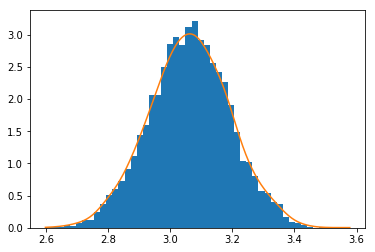

Posterior 95% confidence interval for the variance: [2.95766786 4.41577607]


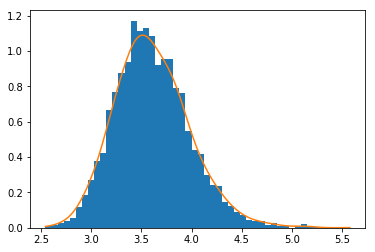

In [23]:
# Compute 95% posterior confidence intervals for the mean and the variance
mean_conf = np.percentile(samples['mu_mean'], [2.5, 97.5])
sigma2_conf = np.percentile(samples['sigma2'], [2.5, 97.5])

# Plot mean histogram
print("Posterior 95% confidence interval for the mean:", mean_conf)

plot1 = samples['mu_mean']
density = gaussian_kde(plot1)
xs = np.linspace(min(plot1), max(plot1), 200)
plt.hist(plot1, bins=50, density=True)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

# Plot variance histogram
print("Posterior 95% confidence interval for the variance:", sigma2_conf)

plot2 = samples['sigma2']
density = gaussian_kde(plot2)
xs = np.linspace(min(plot2), max(plot2), 200)
plt.hist(plot2, bins=50, density=True)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()


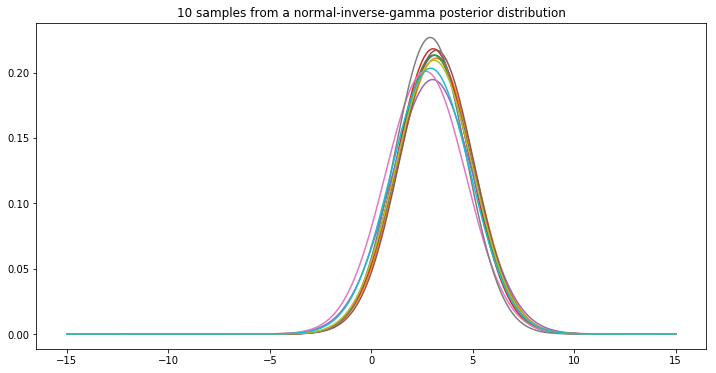

In [25]:
# Take random 10 samples
num_samples = 10
mean_10 = np.random.choice(samples['mu_mean'], num_samples)
variance_10 =  np.random.choice(samples['sigma2'], num_samples)

# Plot the normal distributions corresponding to the samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    plot_y = stats.norm.pdf(plot_x, loc=mean_10[i], scale=np.sqrt(variance_10[i]))
    plt.plot(plot_x, plot_y)
plt.title('10 samples from a normal-inverse-gamma posterior distribution')
plt.show()